# Student Performance Indicator

**1) Problem statement**
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


**2) Data Collection**
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [3]:
df = pd.read_csv('./data/student.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## About the dataset

In [6]:
print(f"Shape of the data -> {df.shape}")
print(f"Size of the data -> {df.size}")

Shape of the data -> (1000, 8)
Size of the data -> 8000


In [7]:
print(f"Columns of the dataset ({len(df.columns)})->\n{df.columns}")

Columns of the dataset (8)->
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the dataset**

In [11]:
df.duplicated().sum()

np.int64(0)

**There also no duplicate values**

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Exploring the data

In [13]:
print("Categories in 'gender' variable: ", end="")
print(df['gender'].unique(), end="\n\n")

print("Categories in 'race/ethnicity' variable: ", end="")
print(df['race_ethnicity'].unique(), end="\n\n")

print("Categories in 'parental level of education' variable: ", end="")
print(df['parental_level_of_education'].unique(), end="\n\n")

print("Categories in 'lunch' variable: ", end="")
print(df['lunch'].unique(), end="\n\n")

print("Categories in 'test preparation course' variable: ", end="")
print(df['test_preparation_course'].unique(), end="\n\n")

Categories in 'gender' variable: ['female' 'male']

Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable: ['standard' 'free/reduced']

Categories in 'test preparation course' variable: ['none' 'completed']



In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f"Numerical Features ({len(numerical_features)}):\n{numerical_features}")
print(f"\nCategorical Features ({len(categorical_features)}):\n{categorical_features}")

Numerical Features (3):
['math_score', 'reading_score', 'writing_score']

Categorical Features (5):
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
# Aggregating the columns math_score, reading_score, writing_score into new columns total_score and average_score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f"Number of students who scored full marks in reading: {reading_full}")
print(f"Number of students who scored full marks in writing: {writing_full}")
print(f"Number of students who scored full marks in math: {math_full}")

Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14
Number of students who scored full marks in math: 7


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f"Number of students who scored less than 20 in reading: {reading_less_20}")
print(f"Number of students who scored less than 20 in writing: {writing_less_20}")
print(f"Number of students who scored less than 20 in math: {math_less_20}")

Number of students who scored less than 20 in reading: 1
Number of students who scored less than 20 in writing: 3
Number of students who scored less than 20 in math: 4


**Insights**
- From above values we infer that students have performed the worst in Maths.
- Best performance is in reading section.

## Exploratory Data Analysis

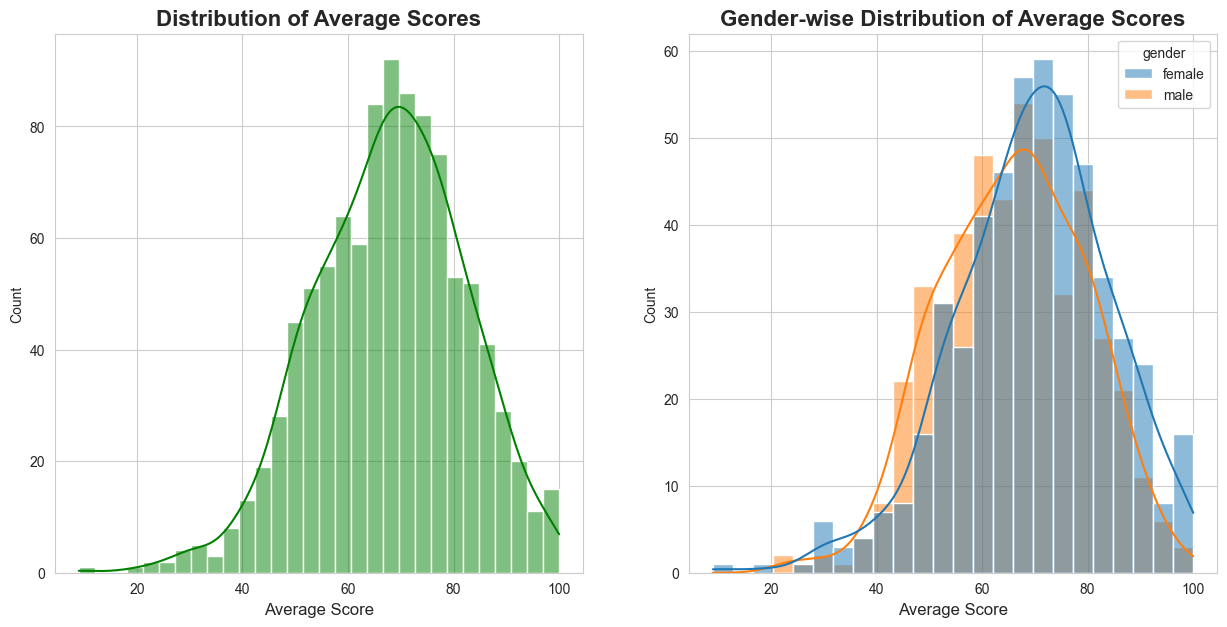

In [18]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Distribution of Average Scores", size=16, weight='bold')
sns.histplot(data=df, x='average_score',bins=30,kde=True,color='g')
plt.xlabel('Average Score', size=12)
plt.subplot(1, 2, 2)
plt.title("Gender-wise Distribution of Average Scores", size=16, weight='bold')
sns.histplot(data=df, x='average_score',kde=True,hue='gender')
plt.xlabel('Average Score', size=12)
plt.show()

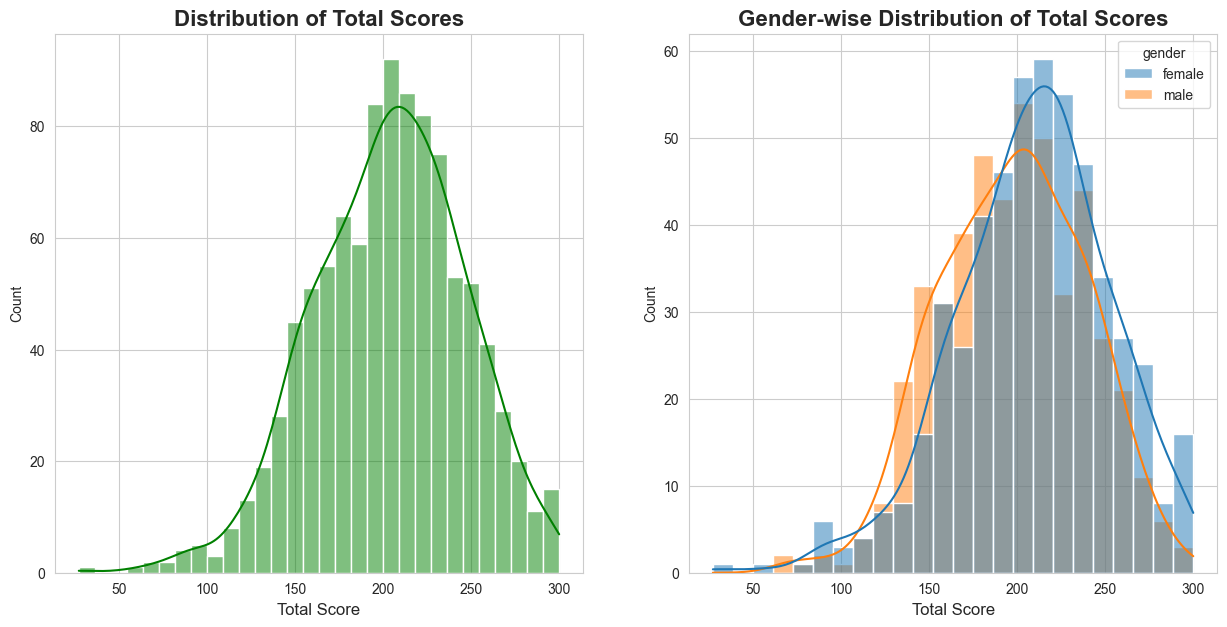

In [19]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Distribution of Total Scores", size=16, weight='bold')
sns.histplot(data=df, x='total_score',bins=30,kde=True,color='g')
plt.xlabel('Total Score', size=12)
plt.subplot(1, 2, 2)
plt.title("Gender-wise Distribution of Total Scores", size=16, weight='bold')
sns.histplot(data=df, x='total_score',kde=True,hue='gender')
plt.xlabel('Total Score', size=12)
plt.show()

**Insights**
- Female students tend to perform better than male students.

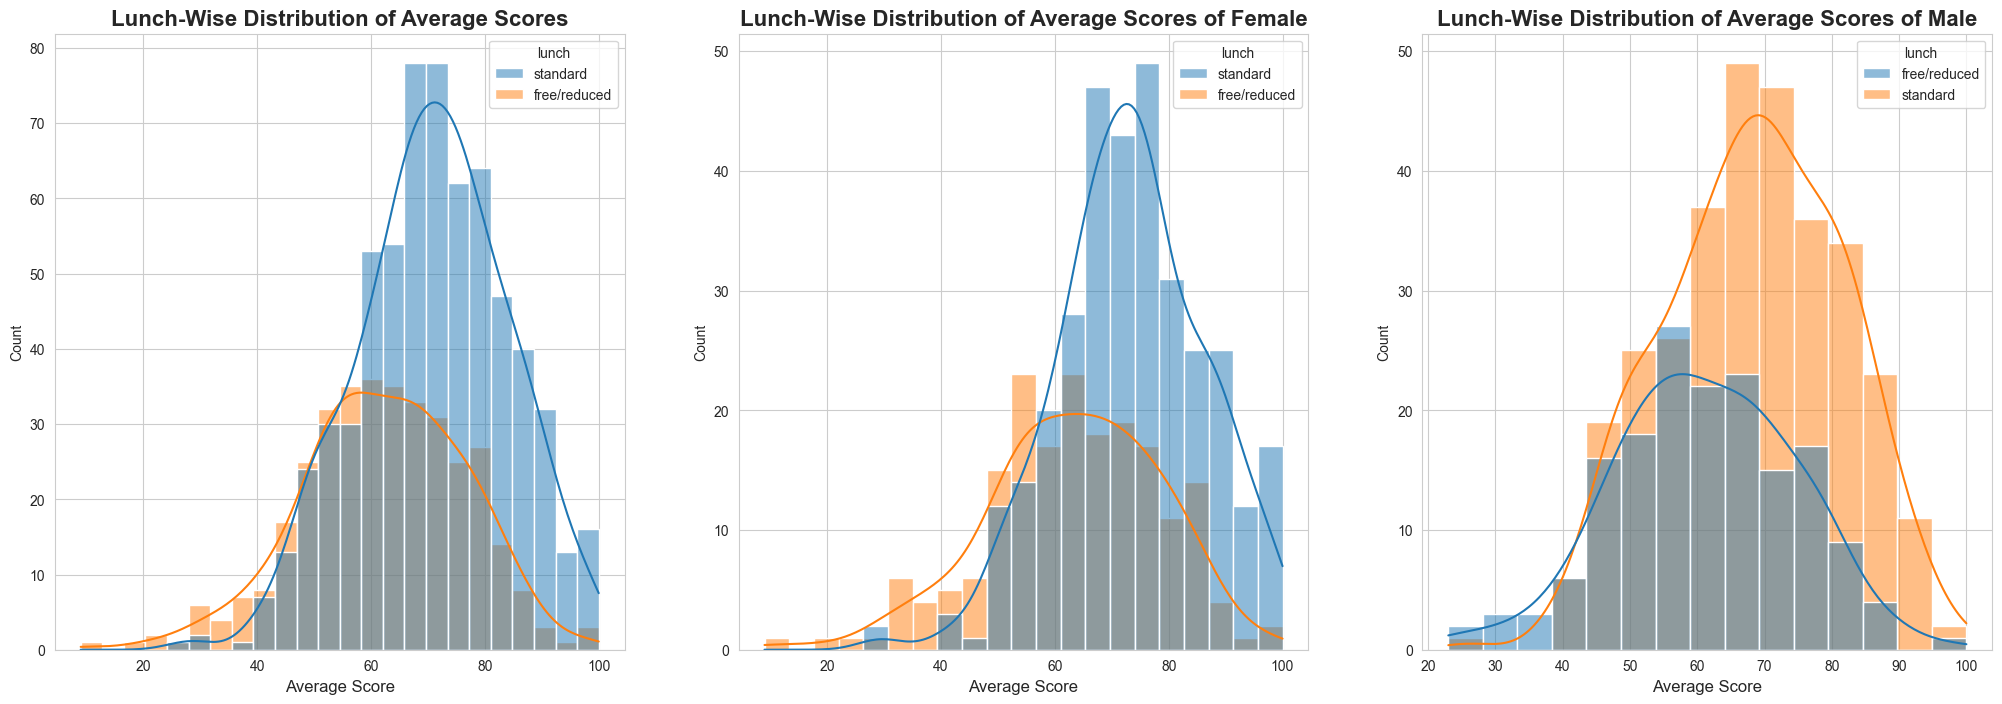

In [20]:
sns.set_style('whitegrid')
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
plt.title("Lunch-Wise Distribution of Average Scores", size=16, weight='bold')
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.xlabel('Average Score', size=12)
plt.subplot(132)
plt.title("Lunch-Wise Distribution of Average Scores of Female", size=16, weight='bold')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.xlabel('Average Score', size=12)
plt.subplot(133)
plt.title("Lunch-Wise Distribution of Average Scores of Male", size=16, weight='bold')
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.xlabel('Average Score', size=12)
plt.show()

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

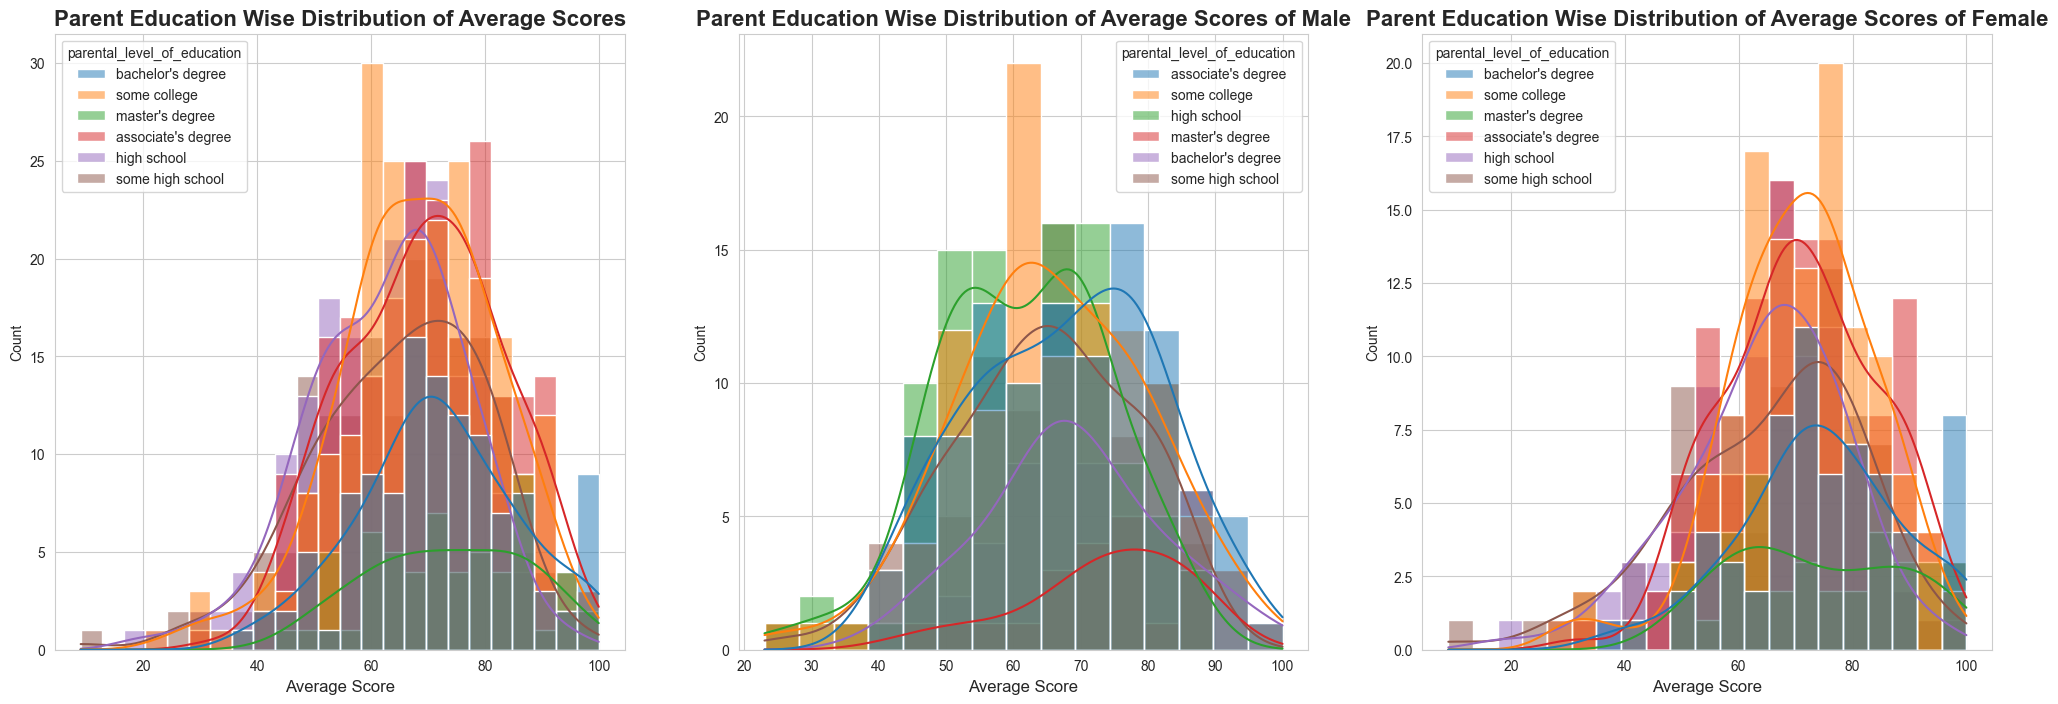

In [21]:
sns.set_style('whitegrid')
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
plt.title("Parent Education Wise Distribution of Average Scores", size=16, weight='bold')
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.xlabel('Average Score', size=12)
plt.subplot(132)
plt.title("Parent Education Wise Distribution of Average Scores of Male", size=16, weight='bold')
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.xlabel('Average Score', size=12)
plt.subplot(133)
plt.title("Parent Education Wise Distribution of Average Scores of Female", size=16, weight='bold')
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.xlabel('Average Score', size=12)
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

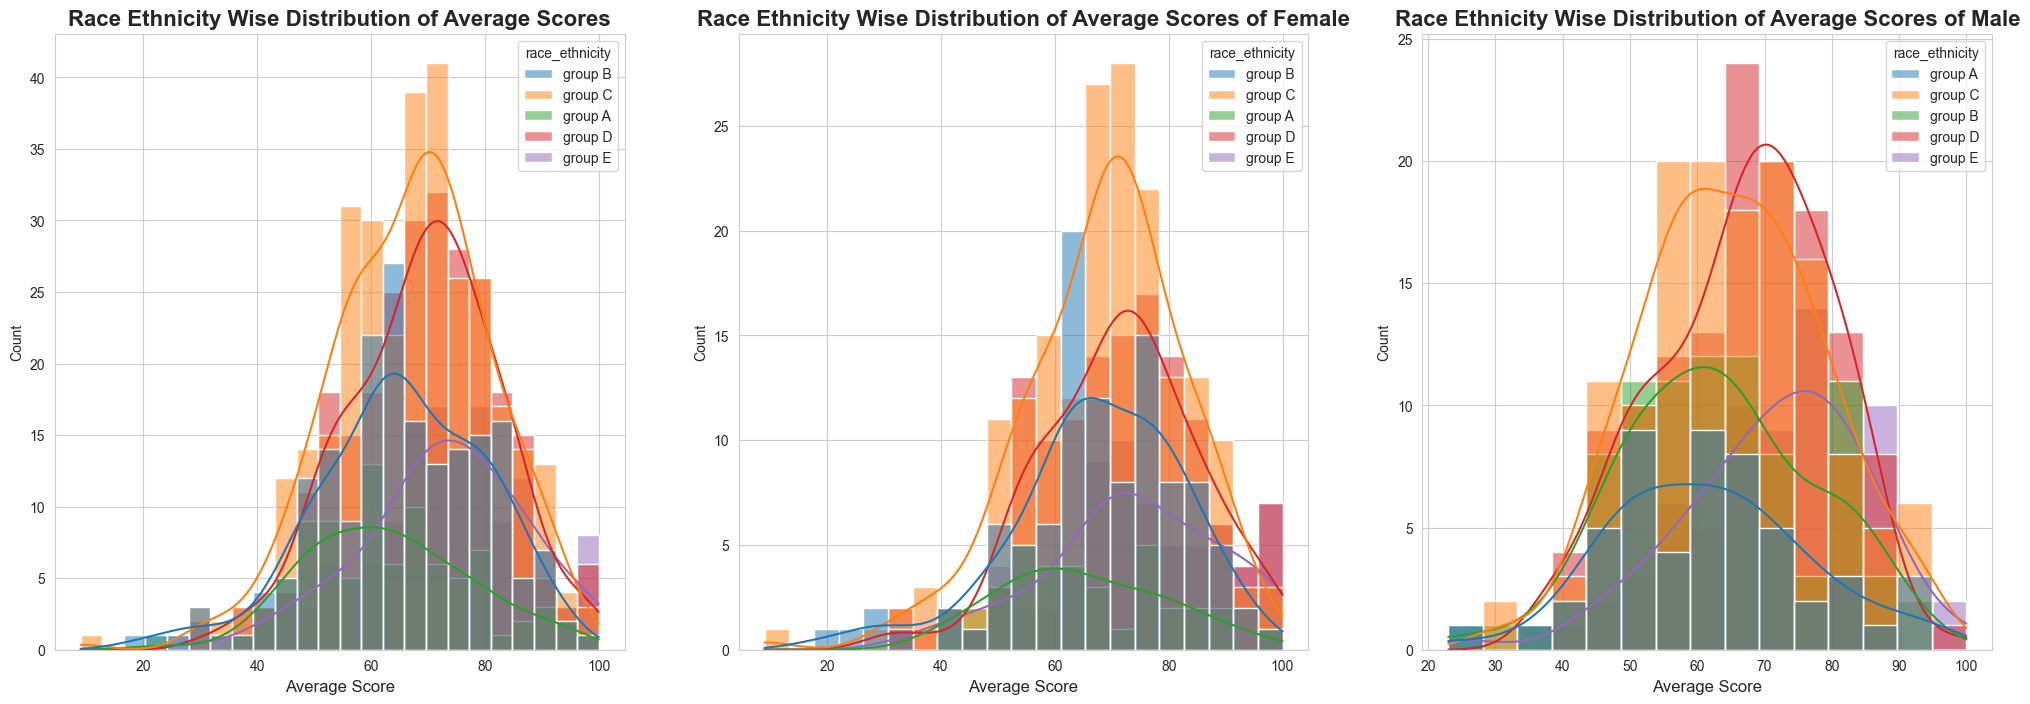

In [22]:
sns.set_style('whitegrid')
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
plt.title("Race Ethnicity Wise Distribution of Average Scores", size=16, weight='bold')
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.xlabel('Average Score', size=12)
plt.subplot(132)
plt.title("Race Ethnicity Wise Distribution of Average Scores of Female", size=16, weight='bold')
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.xlabel('Average Score', size=12)
plt.subplot(133)
plt.title("Race Ethnicity Wise Distribution of Average Scores of Male", size=16, weight='bold')
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.xlabel('Average Score', size=12)
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

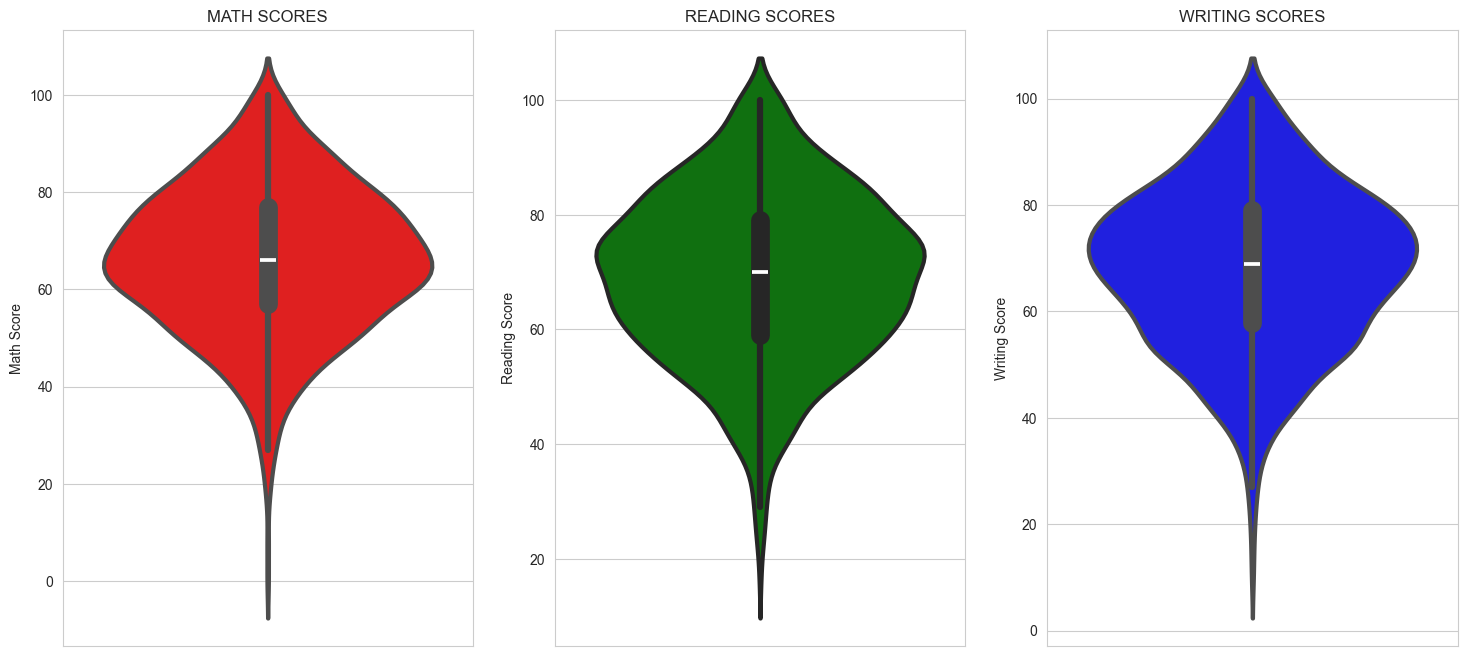

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.ylabel("Math Score")
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.ylabel("Reading Score")
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.ylabel("Writing Score")
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

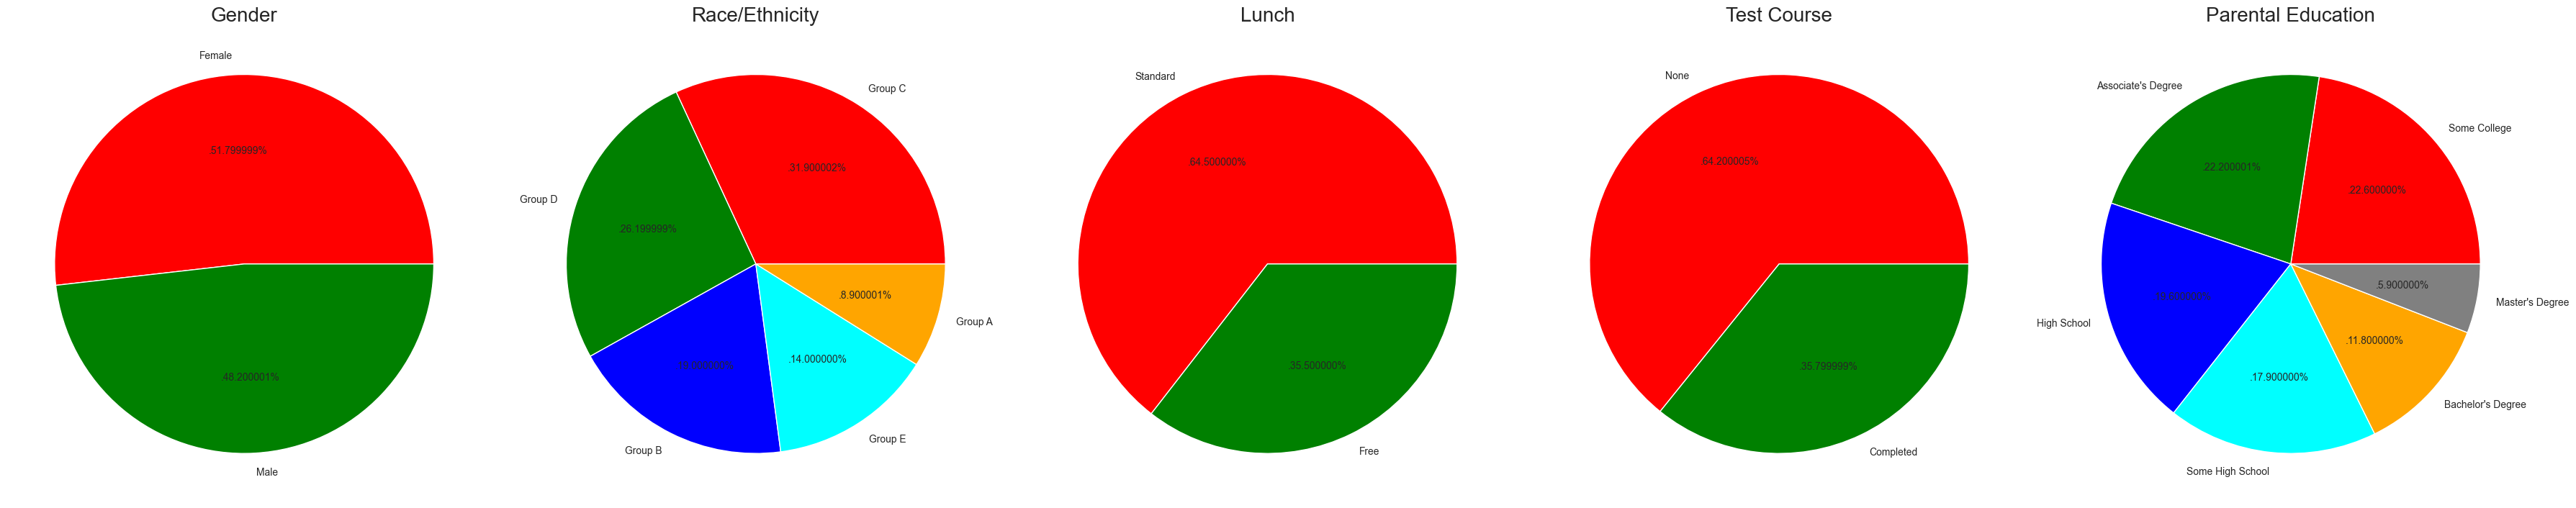

In [30]:
sns.set_style('white')
plt.rcParams['figure.figsize'] = (36, 18)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Univariate Analysis

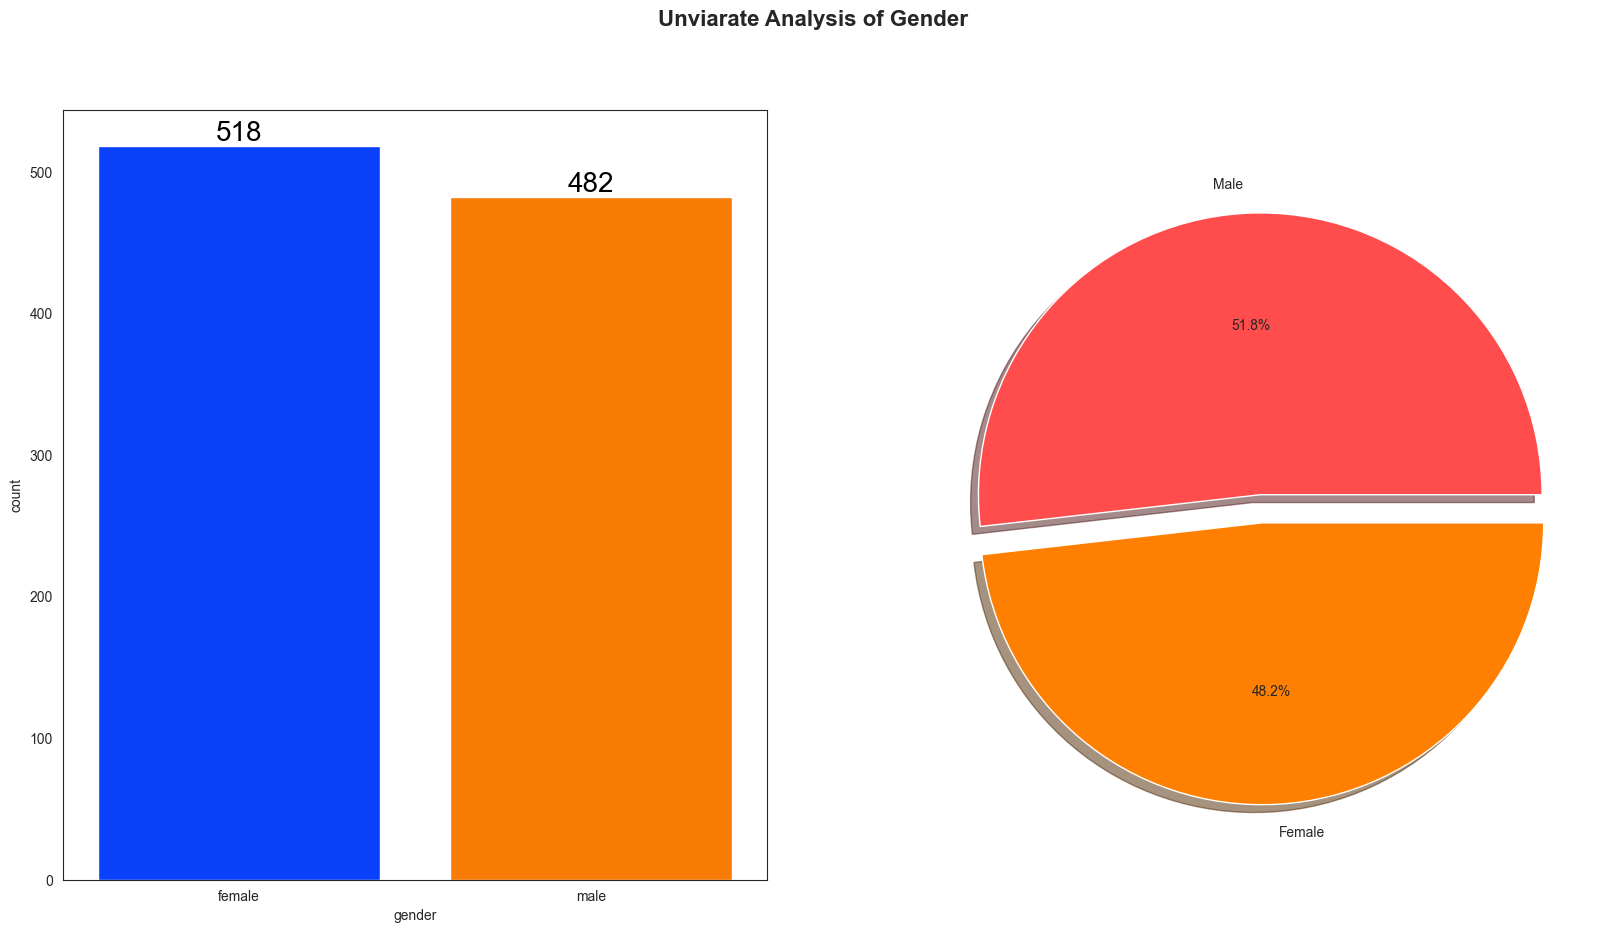

In [42]:
sns.set_style('white')
f,ax=plt.subplots(1,2,figsize=(20,10))
f.suptitle("Unviarate Analysis of Gender", size=16, weight='bold')
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

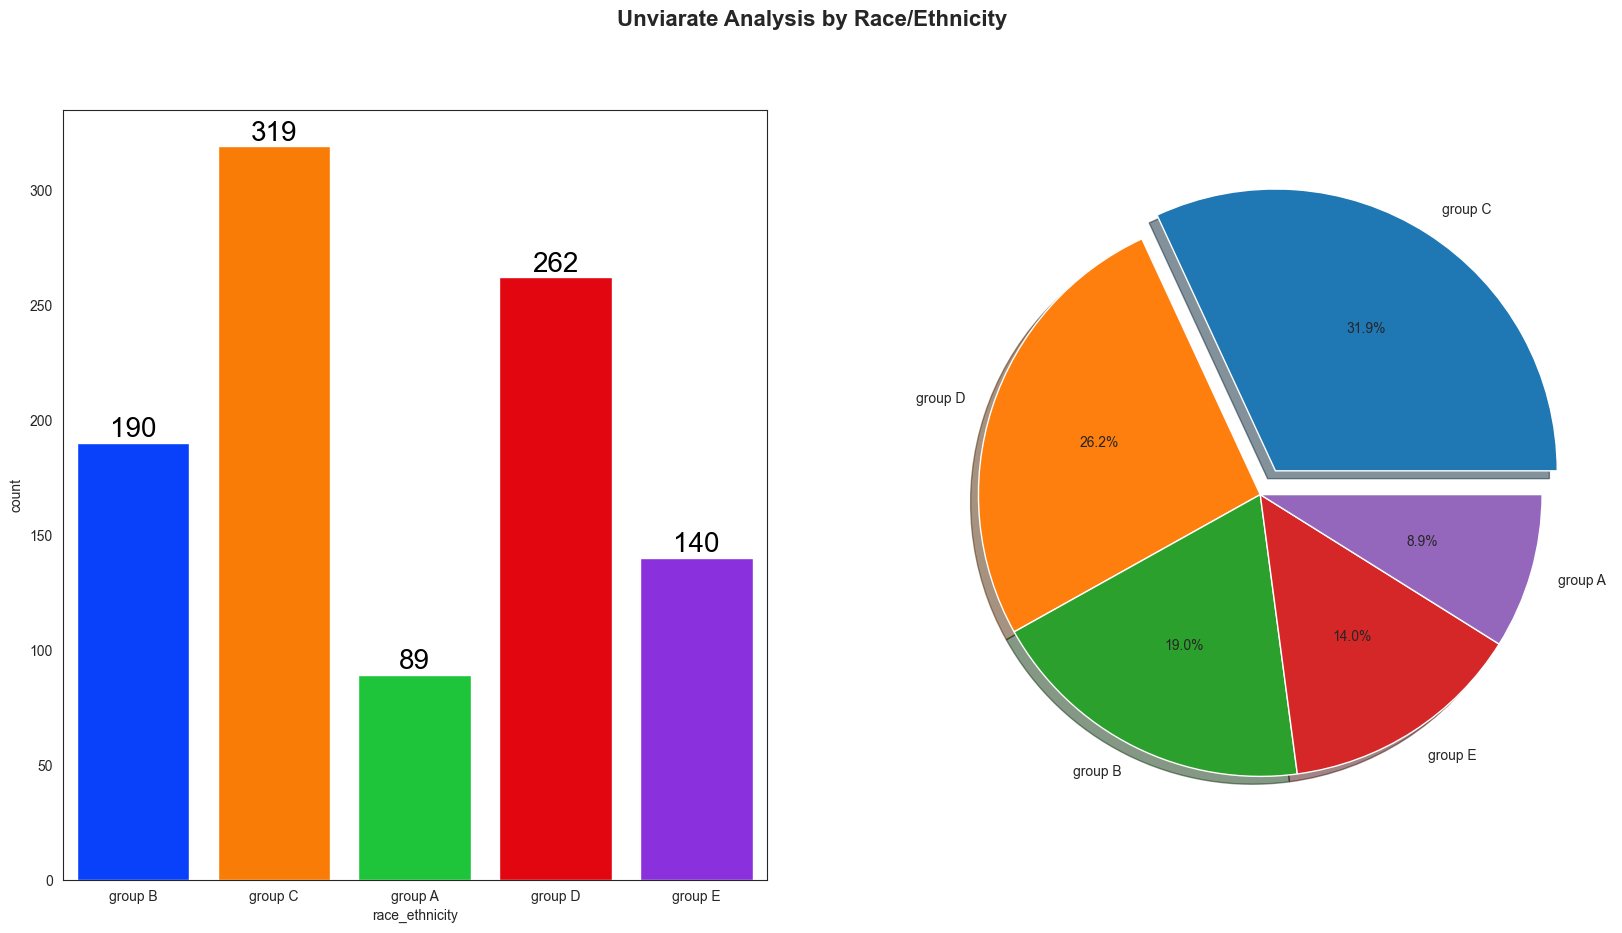

In [41]:
sns.set_style('white')
f,ax=plt.subplots(1,2,figsize=(20,10))
f.suptitle("Unviarate Analysis by Race/Ethnicity", size=16, weight='bold')
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Insights**
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

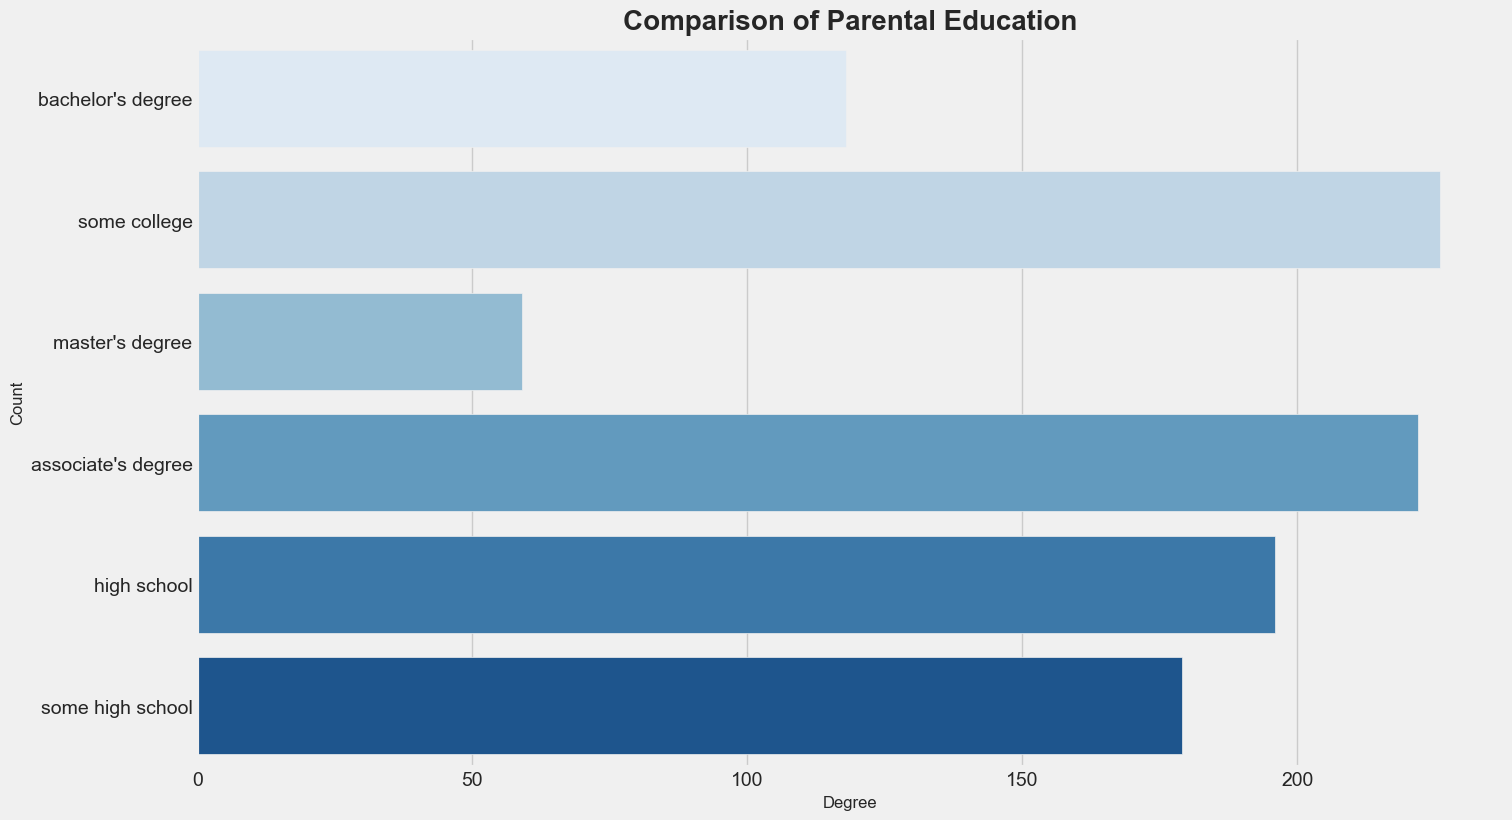

In [45]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 'bold', fontsize = 20)
plt.xlabel('Degree', size=12)
plt.ylabel('Count', size=12)
plt.show()

**Insights**
- Largest number of parents are from some college.

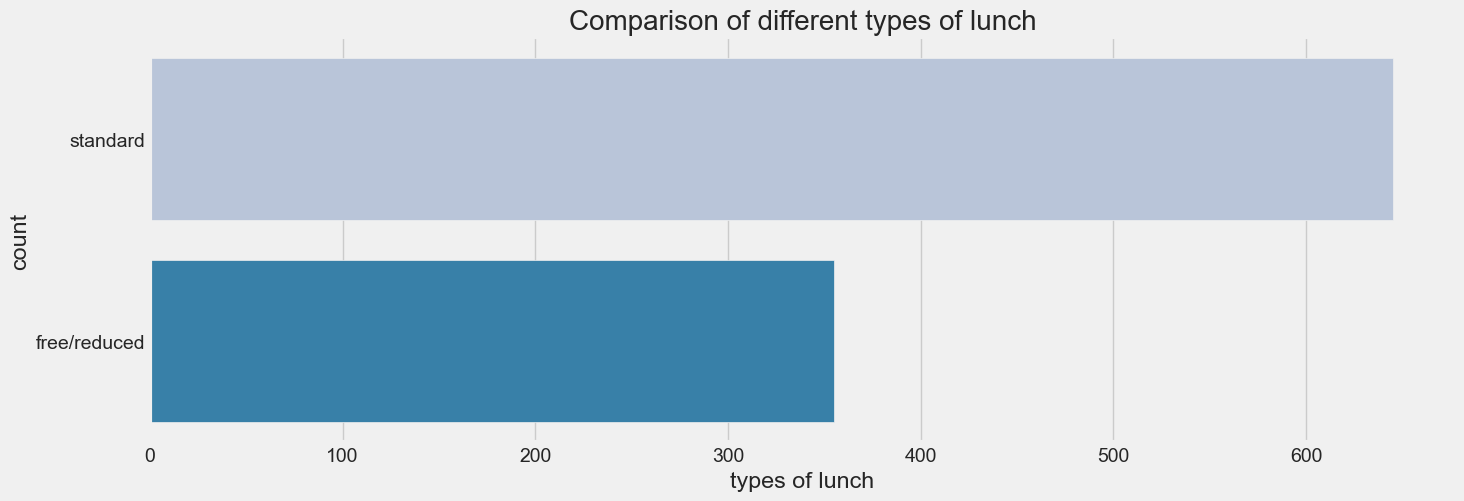

In [51]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Insights**
- Students being served Standard lunch was more than free lunch.

### Bivariate Analysis

In [107]:
# Is gender has any impact on student's performance ?
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math_score  reading_score  writing_score  total_score  average_score
gender                                                                      
female   63.633205      72.608108      72.467181   208.708494      69.569498
male     68.728216      65.473029      63.311203   197.512448      65.837483


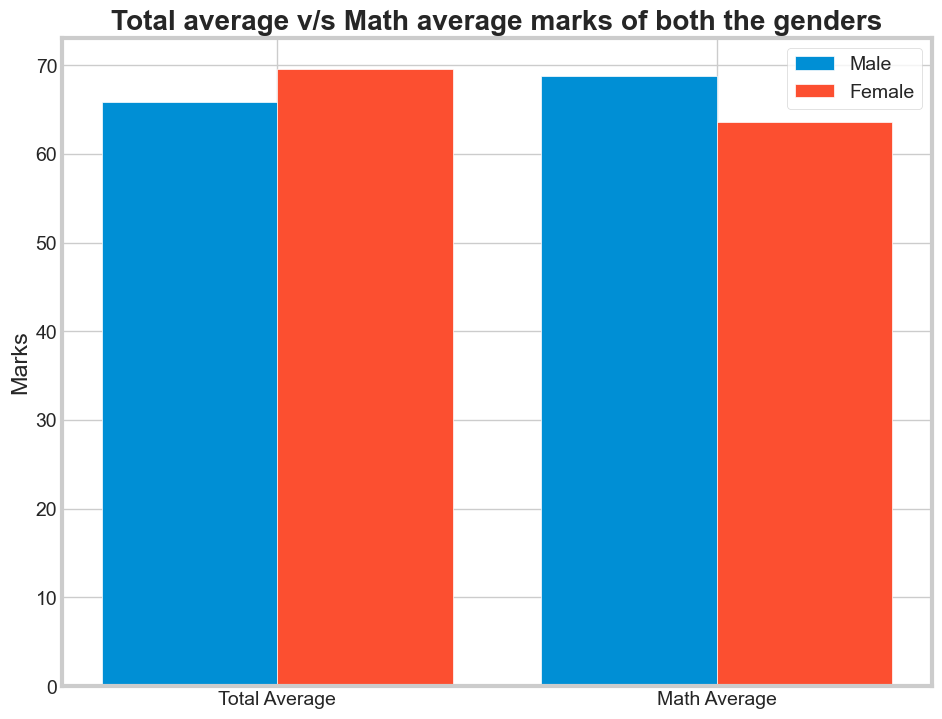

In [109]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

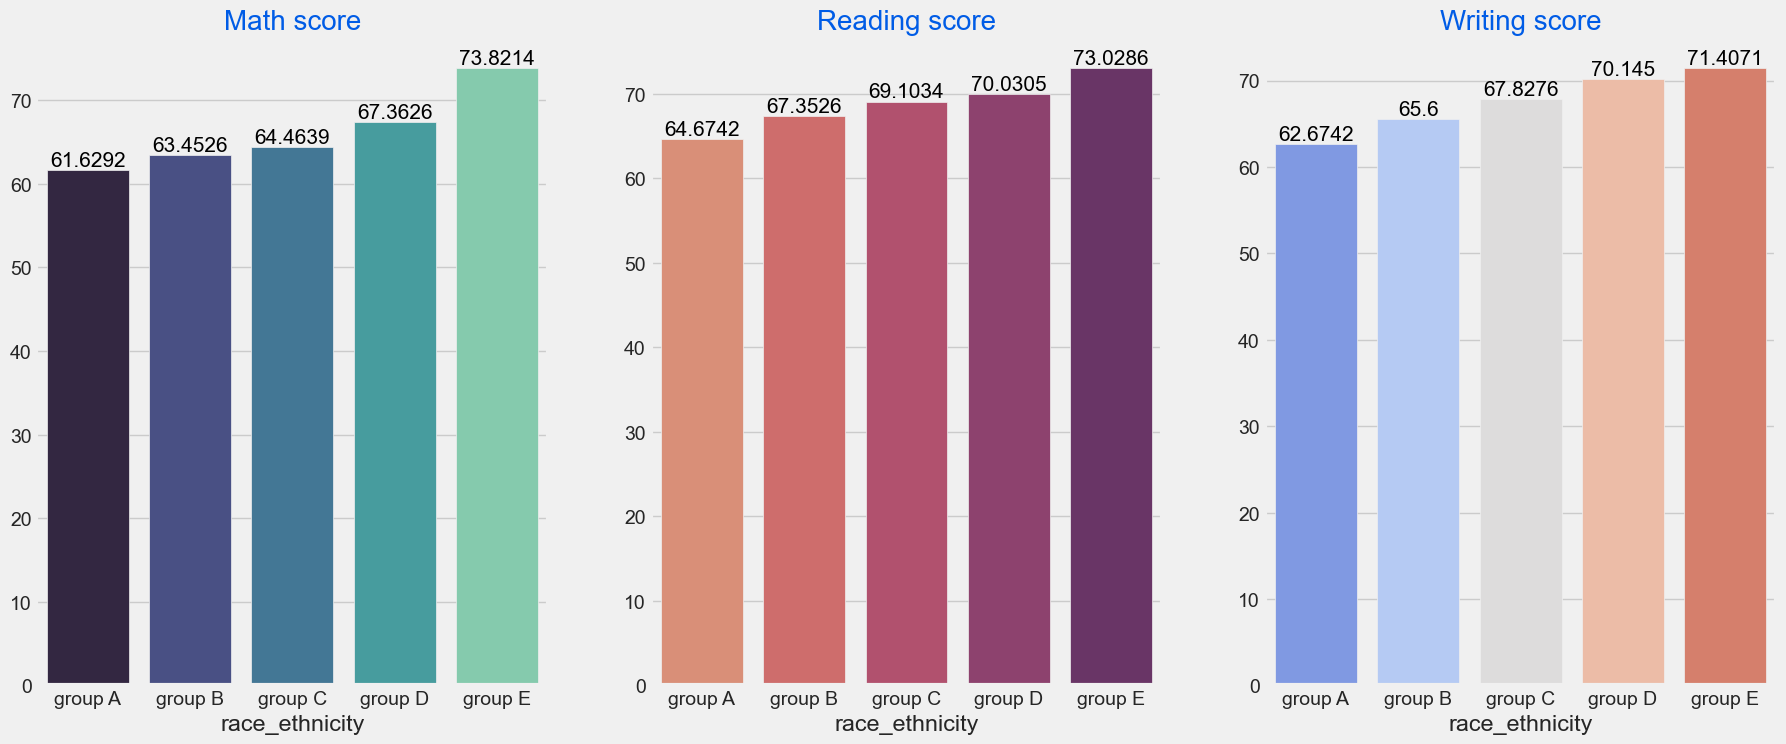

In [53]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects.

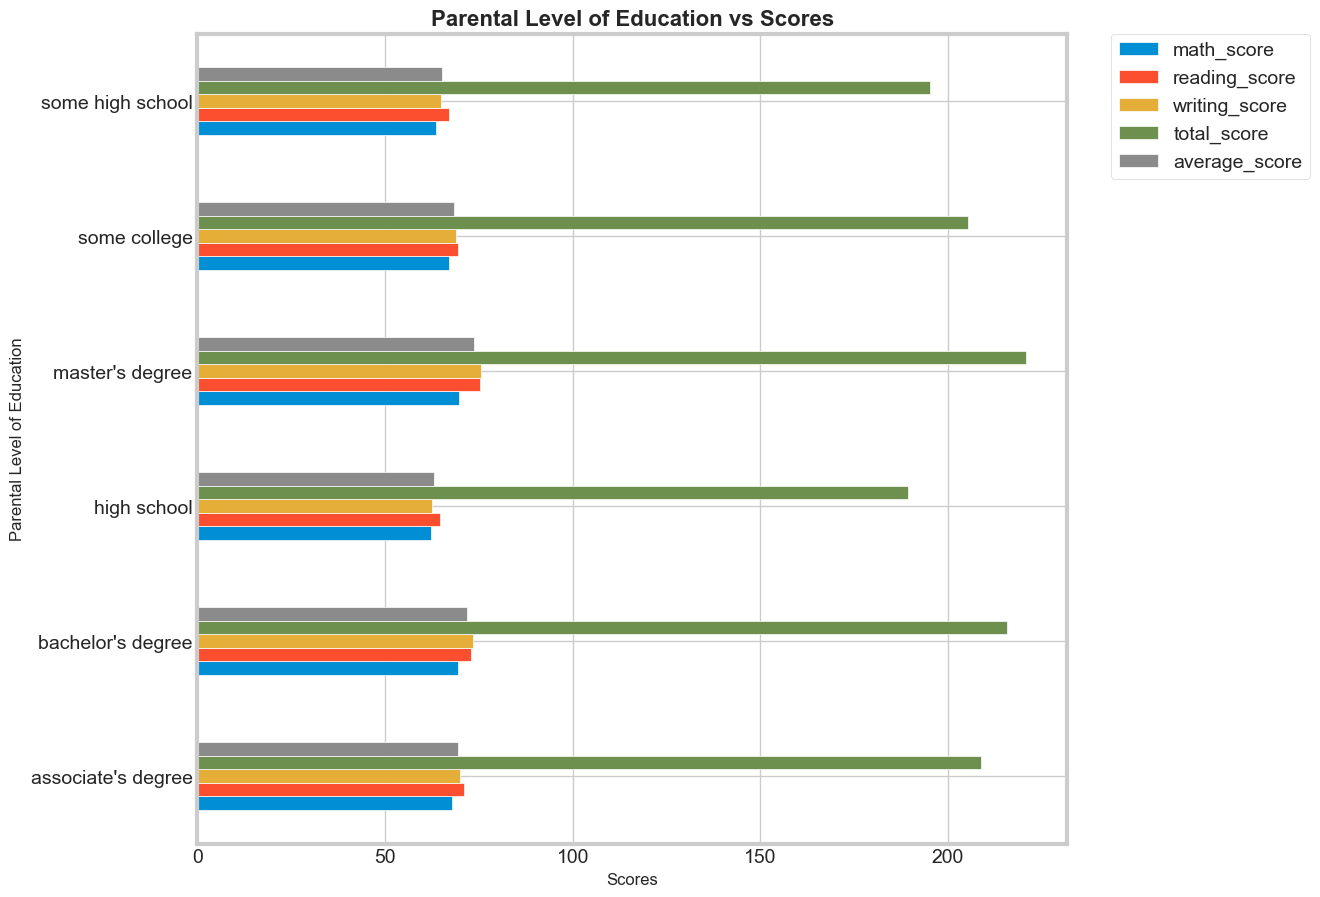

In [112]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Parental Level of Education vs Scores', fontsize=16, weight='bold')
plt.xlabel('Scores', fontsize=12)
plt.ylabel('Parental Level of Education', fontsize=12)
plt.show()

**Insights** 
- The score of student whose parents possess master and bachelor level education are higher than others.

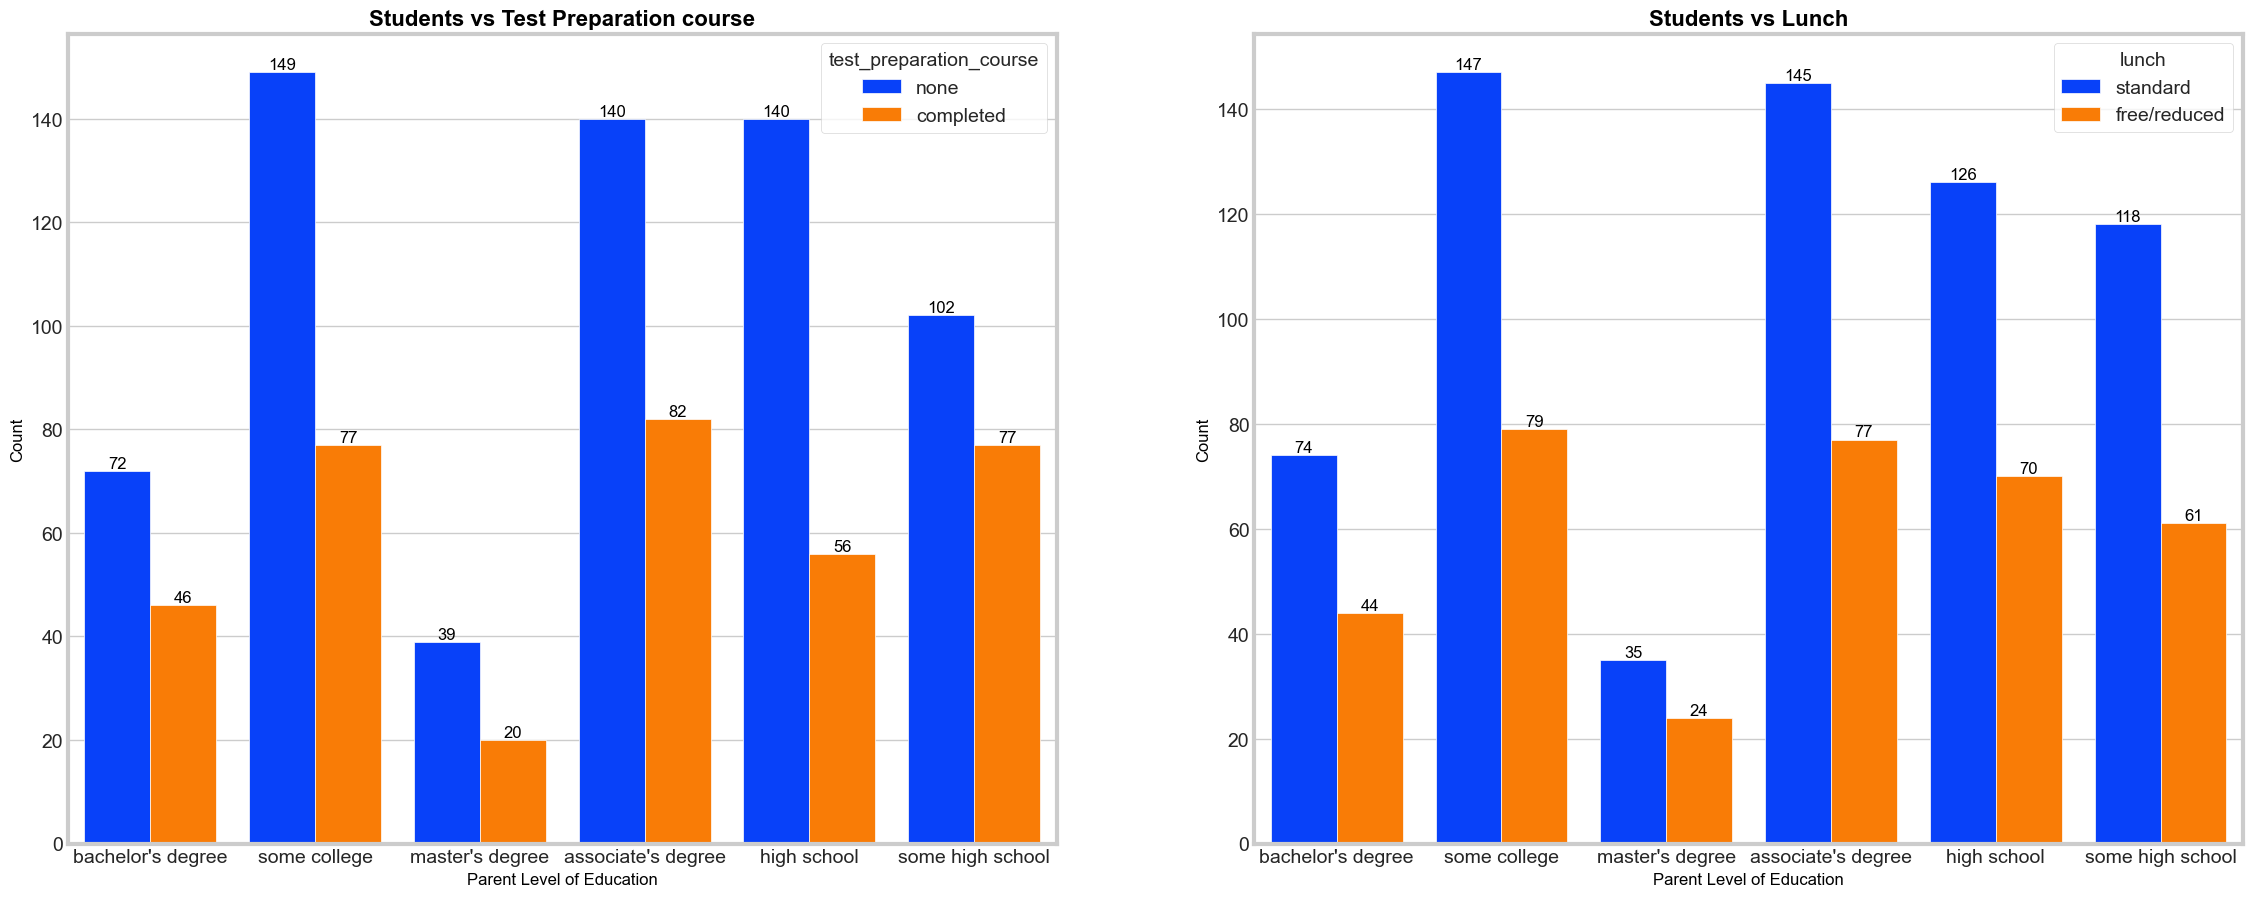

In [78]:
sns.set_style('whitegrid')
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs Test Preparation course',color='black',size=16, weight='bold')
ax[0].set_xlabel('Parent Level of Education',color='black',size=12)
ax[0].set_ylabel('Count',color='black',size=12)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs Lunch',color='black',size=16, weight='bold')
ax[1].set_xlabel('Parent Level of Education',color='black',size=12)
ax[1].set_ylabel('Count',color='black',size=12)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=12)   

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

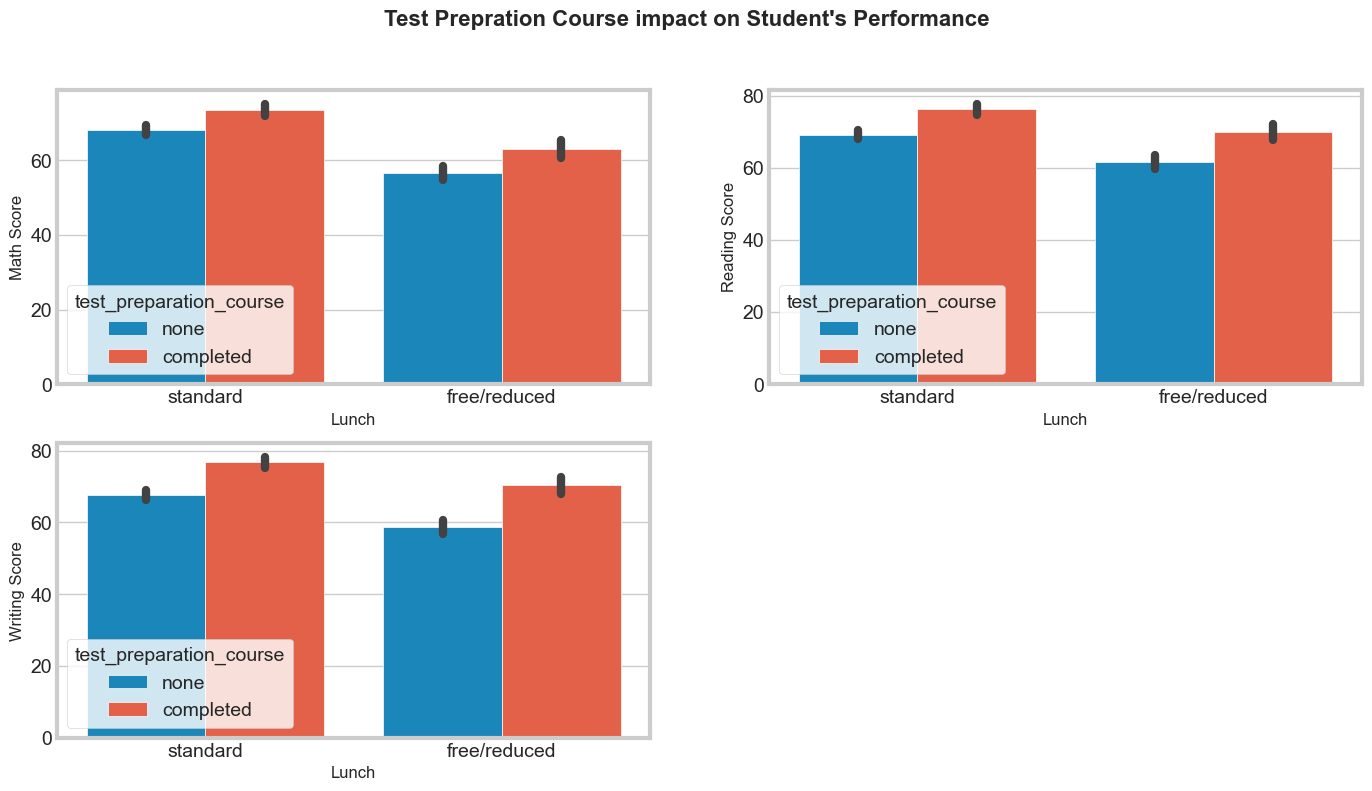

In [93]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.suptitle("Test Prepration Course impact on Student's Performance", size=16, weight='bold')
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.xlabel('Lunch', size=12)
plt.ylabel('Math Score', size=12)
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.xlabel('Lunch', size=12)
plt.ylabel('Reading Score', size=12)
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.xlabel('Lunch', size=12)
plt.ylabel('Writing Score', size=12)
plt.show()

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

### Checking for Outliers

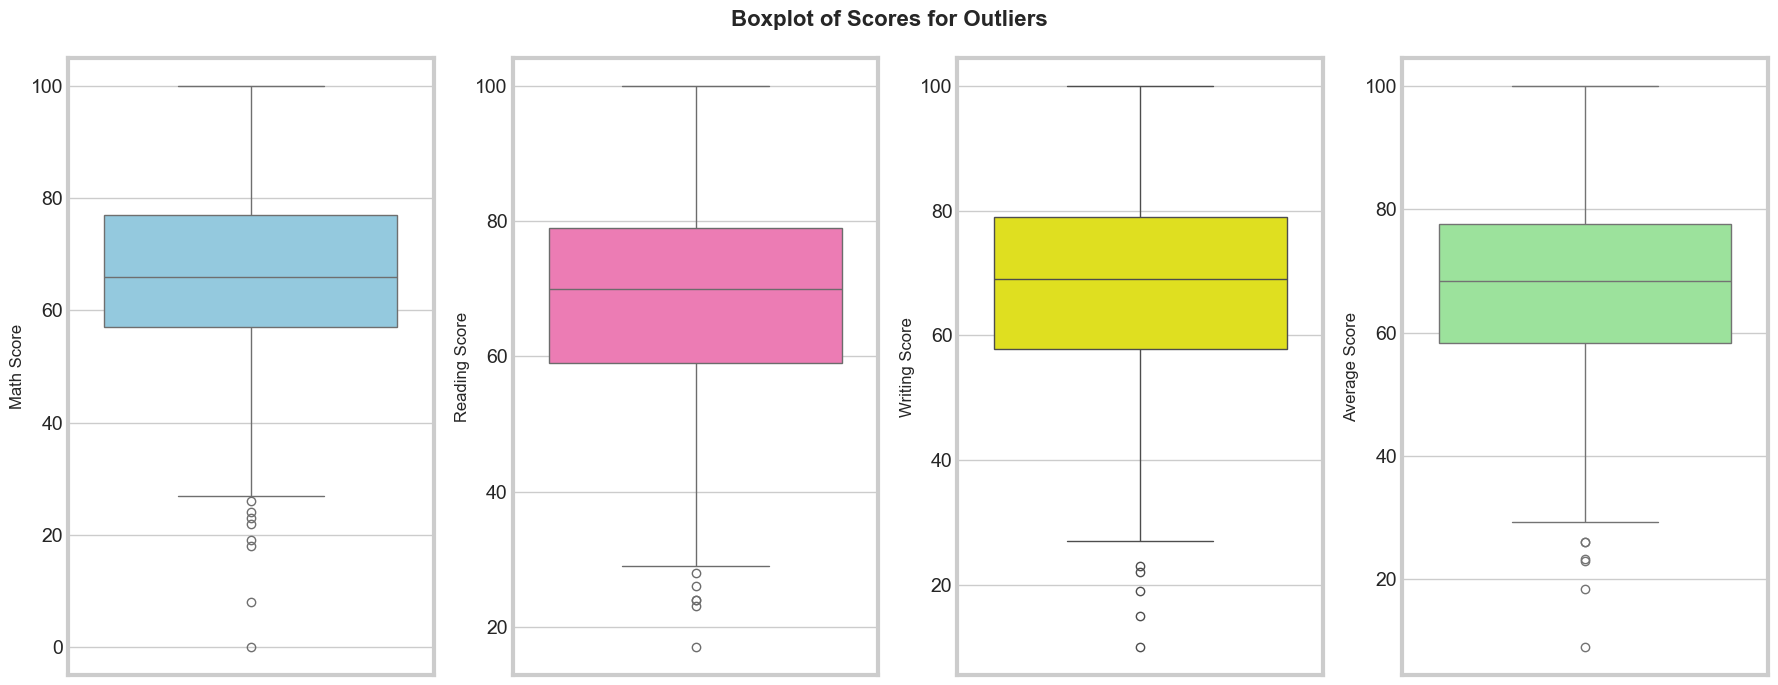

In [103]:
sns.set_style('whitegrid')
plt.subplots(1,4,figsize=(18,7))
plt.suptitle("Boxplot of Scores for Outliers", size=16, weight='bold')
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.ylabel('Math Score', size=12)
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.ylabel('Reading Score', size=12)
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.ylabel('Writing Score', size=12)
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.ylabel('Average Score', size=12)
plt.tight_layout()
plt.show()

### Multivariate Analysis

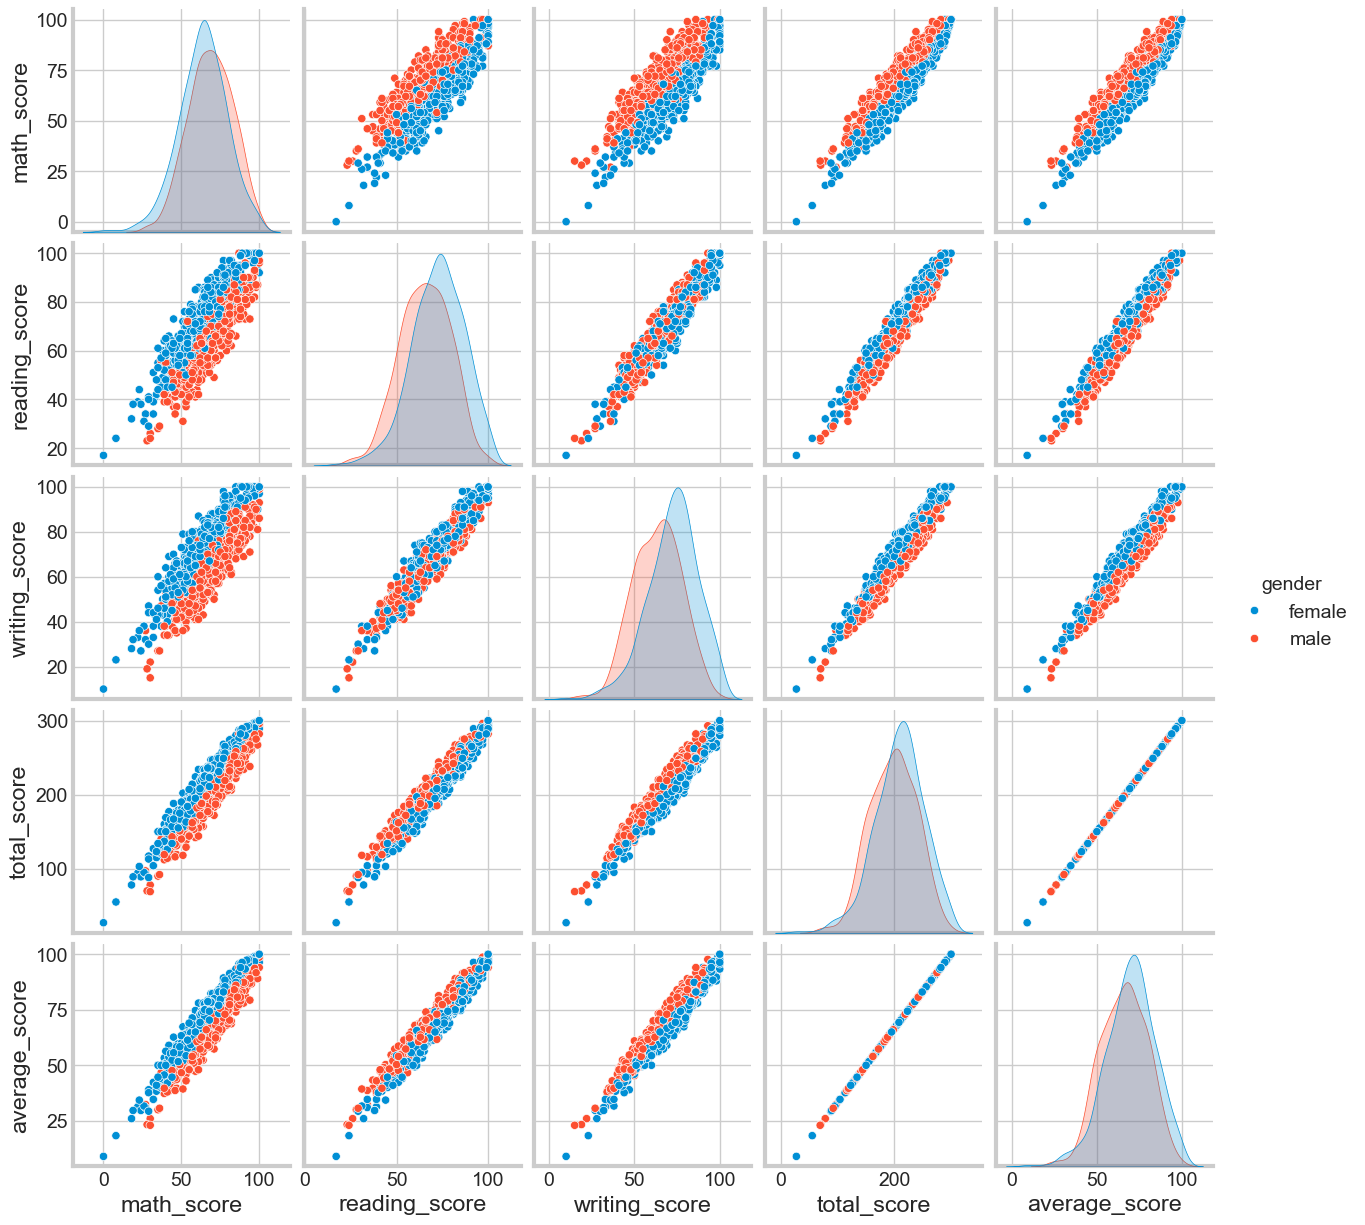

In [104]:
sns.pairplot(df,hue='gender')
plt.show()

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

## Conclusion
- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Student's Performance is not much related with test preparation course.
- Finishing preparation course is benefitial.